In [29]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [33]:
#make sure that you download the ladybug image in the same folder.
image = imread("ladybird2.png")

In [34]:
image.shape

(346, 608, 4)

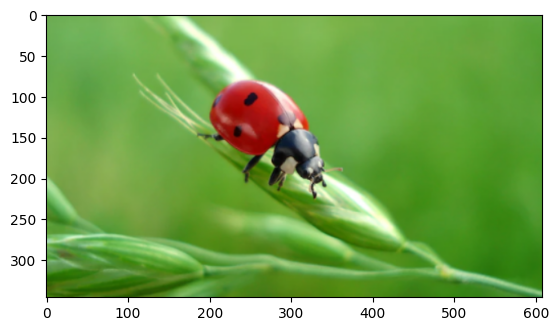

In [35]:
plt.imshow(image)

In [ ]:
x = image.reshape(-1,4) 
#[1,2,3,4,5,6,7,8,9,10,11,12]
12/4 = 3

In [46]:
x

array([[0.81960785, 0.81960785, 0.81960785, 1.        ],
       [0.81960785, 0.81960785, 0.81960785, 1.        ],
       [0.81960785, 0.81960785, 0.81960785, 1.        ],
       ...,
       [0.23921569, 0.5647059 , 0.2901961 , 1.        ],
       [0.25490198, 0.5764706 , 0.3019608 , 1.        ],
       [0.27058825, 0.58431375, 0.3137255 , 1.        ]],
      shape=(210368, 4), dtype=float32)

In [37]:
x.shape

(210368, 4)

In [38]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=4).fit(x)

In [69]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0], shape=(210368,), dtype=int32)

In [70]:
kmeans.cluster_centers_

array([[0.29790816, 0.5548722 , 0.1262976 , 1.        ],
       [0.44422236, 0.6724063 , 0.29302332, 1.        ],
       [0.49387032, 0.1234602 , 0.10829514, 1.        ],
       [0.76289916, 0.8586854 , 0.66531503, 1.        ]], dtype=float32)

In [71]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [72]:
segmented_image

array([[0.76289916, 0.8586854 , 0.66531503, 1.        ],
       [0.76289916, 0.8586854 , 0.66531503, 1.        ],
       [0.76289916, 0.8586854 , 0.66531503, 1.        ],
       ...,
       [0.29790816, 0.5548722 , 0.1262976 , 1.        ],
       [0.29790816, 0.5548722 , 0.1262976 , 1.        ],
       [0.29790816, 0.5548722 , 0.1262976 , 1.        ]],
      shape=(210368, 4), dtype=float32)

In [73]:
segmented_image = segmented_image.reshape(image.shape)

cluster_centers_ = [
    [255,   0,   0],   # red
    [  0, 255,   0],   # green
    [  0,   0, 255]    # blue
]

labels_ = [2, 0, 1]


[
 [  0,   0, 255],   # label 2 → blue
 [255,   0,   0],   # label 0 → red
 [  0, 255,   0]    # label 1 → green
]

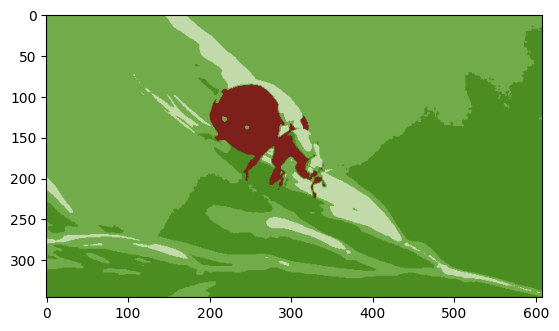

In [74]:
plt.imshow(segmented_image)

In [44]:
kmeans.inertia_

2851.753662109375

Color segmentation treats each pixel as a point in RGB space and applies clustering such as K-Means. Pixels are assigned to the nearest cluster center, effectively grouping similar colors. After clustering, each pixel is replaced with its cluster’s centroid color, producing a segmented image.